# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading and reviewing Data

In [2]:
df = pd.read_csv('DataFiles\Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [4]:
df.duplicated().sum()

0

* We dont need to clean anything here, so we will use the dataset as is. I will start with a correlation analysis and then split the data

# Correlation

<AxesSubplot: >

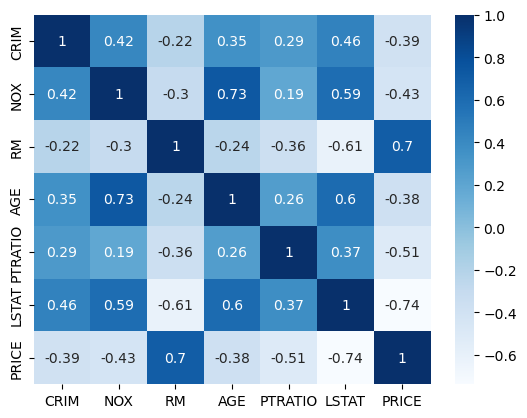

In [5]:
corr = df.corr()
sns.heatmap(data = corr, annot = True, cmap = 'Blues')

* We can see that RM, PTRATIO, and LSTAT are the variables with atleast .5 correlation. We will limit our model to using only those 3 variables

# Setting X and y, and splitting data

In [6]:
features = ['RM','PTRATIO','LSTAT']
target = ['PRICE']

X = df[features]
y = df[target]

print(X.describe())
print(y.describe())

               RM     PTRATIO       LSTAT
count  506.000000  506.000000  506.000000
mean     6.284634   18.455534   12.653063
std      0.702617    2.164946    7.141062
min      3.561000   12.600000    1.730000
25%      5.885500   17.400000    6.950000
50%      6.208500   19.050000   11.360000
75%      6.623500   20.200000   16.955000
max      8.780000   22.000000   37.970000
            PRICE
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Pipelines, Transformers, and Model
We only have numeric data so I only need to scale the features and fit the model. I don't even need the column selector since I created a features variable above

In [8]:
# Scaler
scaler = StandardScaler()

# Tuple
num_tuple = (scaler, features)

# Transformer
col_transformer = make_column_transformer(num_tuple, remainder = 'passthrough')

In [9]:
# Model
lin_reg = LinearRegression()

# Pipeline
proc_pipeline = make_pipeline(col_transformer, lin_reg)
proc_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['RM', 'PTRATIO',
                                                   'LSTAT'])])),
                ('linearregression', LinearRegression())])

# Fitting and Predicting

In [10]:
proc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['RM', 'PTRATIO',
                                                   'LSTAT'])])),
                ('linearregression', LinearRegression())])

In [11]:
y_hat_train = proc_pipeline.predict(X_train)
y_hat_test = proc_pipeline.predict(X_test)

# Testing 

## R-Squared

In [12]:
train_r2 = r2_score(y_train, y_hat_train)
test_r2 = r2_score(y_test, y_hat_test)

print(f'Training r2: {train_r2}')
print(f'Testing r2: {test_r2}')

Training r2: 0.6877966145058925
Testing r2: 0.6331590458194676


The Training R2 was about 69, while the Testing was 63.

## Mean Absolute Error (MAE)

In [13]:
train_MAE = mean_absolute_error(y_train, y_hat_train)
test_MAE = mean_absolute_error(y_test, y_hat_test)

print(f'Training MAE: {train_MAE}')
print(f'Testing MAE: {test_MAE}')

Training MAE: 3.714054057158005
Testing MAE: 3.3918448293813968


What appear to be small errors. The STD Dev in price for the initial target vector was 9, and we are below that for both the training and testing data.

## Mean Squared Error (MSE)

In [14]:
train_MSE = mean_squared_error(y_train, y_hat_train)
test_MSE = mean_squared_error(y_test, y_hat_test)

print(f'Training MSE: {train_MSE}')
print(f'Testing MSE: {test_MSE}')

Training MSE: 27.68673681796949
Testing MSE: 25.688824196675963


MSE shows that there are some larger errors, but its a bit hard to interprit. I will take the Root Mean Squared Error next

## Root Mean Squared Error (RMSE)

In [15]:
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Training RMSE: {train_RMSE}')
print(f'Testing RMSE: {test_RMSE}')

Training RMSE: 5.261818774717492
Testing RMSE: 5.0684143671049595


This shows that although the MAE is low, there are some larger errors in the model. Both the training and testing predictions were consistent.